# Introduction

TODO: add here introductary description of the project

# Imports and Data

In [147]:

import pandas as pd
import numpy as np
from config import DATASET_NAME

In [148]:
DATASET_NAME.parent / "train.csv"

PosixPath('/Users/lizarabkina/PythonProjects/Cardio/data/train.csv')

In [149]:
df = pd.read_csv(DATASET_NAME, sep=";")

In [150]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [151]:
df.shape,df.columns.tolist()


((70000, 13),
 ['id',
  'age',
  'gender',
  'height',
  'weight',
  'ap_hi',
  'ap_lo',
  'cholesterol',
  'gluc',
  'smoke',
  'alco',
  'active',
  'cardio'])

Columns - Features:
- age - in days (convert to years)
- gender - 1/2 (female/male)
- height - in cm
- weight - in kg
- ap_hi,ap_lo - systolic/diastolic blood pressure
- cholesterol,glucose - levels (normal, 2: above normal, 3: well above normal )
- smoke,alco,active - binary lifestyle features
- cardio - target (1 = disease,0 = no disease)


In [152]:
print("Missing values:\n",df.isnull().sum())

Missing values:
 id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


- We have no Null values

We remove id because it doesn't have any meaning.

In [153]:
df = df.drop(columns=['id'])

In [154]:
print(f"Dataset contains {df.duplicated().sum()} duplicates.")

Dataset contains 24 duplicates.


In [155]:
duplicated = df[df.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['gender', 'height', 'weight'], ascending= False)
duplicated.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
10494,16937,2,170,70.0,120,80,1,1,0,0,0,0
44653,16937,2,170,70.0,120,80,1,1,0,0,0,0
1142,17493,2,169,74.0,120,80,1,1,0,0,1,1
50432,17493,2,169,74.0,120,80,1,1,0,0,1,1
32683,17535,2,165,65.0,120,80,1,1,0,0,1,0


In [156]:
df.drop_duplicates(keep="first", inplace =True)
print(f"After removal of duplicates total of {df.shape[0]} rows and {df.shape[1]} columns remained.")

After removal of duplicates total of 69976 rows and 12 columns remained.


# EDA

## Quick Data Checks

- Check data types

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69976 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69976 non-null  int64  
 1   gender       69976 non-null  int64  
 2   height       69976 non-null  int64  
 3   weight       69976 non-null  float64
 4   ap_hi        69976 non-null  int64  
 5   ap_lo        69976 non-null  int64  
 6   cholesterol  69976 non-null  int64  
 7   gluc         69976 non-null  int64  
 8   smoke        69976 non-null  int64  
 9   alco         69976 non-null  int64  
 10  active       69976 non-null  int64  
 11  cardio       69976 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


- Check missing data and duplicates

- Basic statistics

In [158]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,69976.0,19468.950126,2467.374620,10798.0,17664.0,19703.0,21327.0,23713.0
gender,69976.0,1.349648,0.476862,1.0,1.0,1.0,2.0,2.0
height,69976.0,164.359152,8.211218,55.0,159.0,165.0,170.0,250.0
weight,69976.0,74.208519,14.397211,10.0,65.0,72.0,82.0,200.0
ap_hi,69976.0,128.820453,154.037729,-150.0,120.0,120.0,140.0,16020.0
ap_lo,69976.0,96.636261,188.504581,-70.0,80.0,80.0,90.0,11000.0
cholesterol,69976.0,1.366997,0.680333,1.0,1.0,1.0,2.0,3.0
gluc,69976.0,1.226535,0.572353,1.0,1.0,1.0,1.0,3.0
smoke,69976.0,0.088159,0.283528,0.0,0.0,0.0,0.0,1.0
alco,69976.0,0.053790,0.225604,0.0,0.0,0.0,0.0,1.0


- Target balance

In [159]:
print("Target groups (absolute values):",df["cardio"].value_counts())
print("_______________________________")
print("Target groups (%):",df["cardio"].value_counts(normalize=True).mul(100).round(2).astype(str) + "%")

Target groups (absolute values): cardio
0    35004
1    34972
Name: count, dtype: int64
_______________________________
Target groups (%): cardio
0    50.02%
1    49.98%
Name: proportion, dtype: object


Observation: Positive class (cardio disease) = 49.7% -> mild imbalance.

- Convert age to years and create BMI

In [160]:
df["age_years"]= (df["age"] / 365.25).round(1)
df["bmi"] = (df["weight"] / (df["height"]/100)**2).round(1)

In [161]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.4,22.0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.4,34.9
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.6,23.5
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.2,28.7
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.8,23.0


In [162]:
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    print(f"\n{col}")
    print(f"Min: {df[col].min()},  Max: {df[col].max()},  Unique: {df[col].nunique()}")



age
Min: 10798,  Max: 23713,  Unique: 8076

gender
Min: 1,  Max: 2,  Unique: 2

height
Min: 55,  Max: 250,  Unique: 109

weight
Min: 10.0,  Max: 200.0,  Unique: 287

ap_hi
Min: -150,  Max: 16020,  Unique: 153

ap_lo
Min: -70,  Max: 11000,  Unique: 157

cholesterol
Min: 1,  Max: 3,  Unique: 3

gluc
Min: 1,  Max: 3,  Unique: 3

smoke
Min: 0,  Max: 1,  Unique: 2

alco
Min: 0,  Max: 1,  Unique: 2

active
Min: 0,  Max: 1,  Unique: 2

cardio
Min: 0,  Max: 1,  Unique: 2

age_years
Min: 29.6,  Max: 64.9,  Unique: 263

bmi
Min: 3.5,  Max: 298.7,  Unique: 494


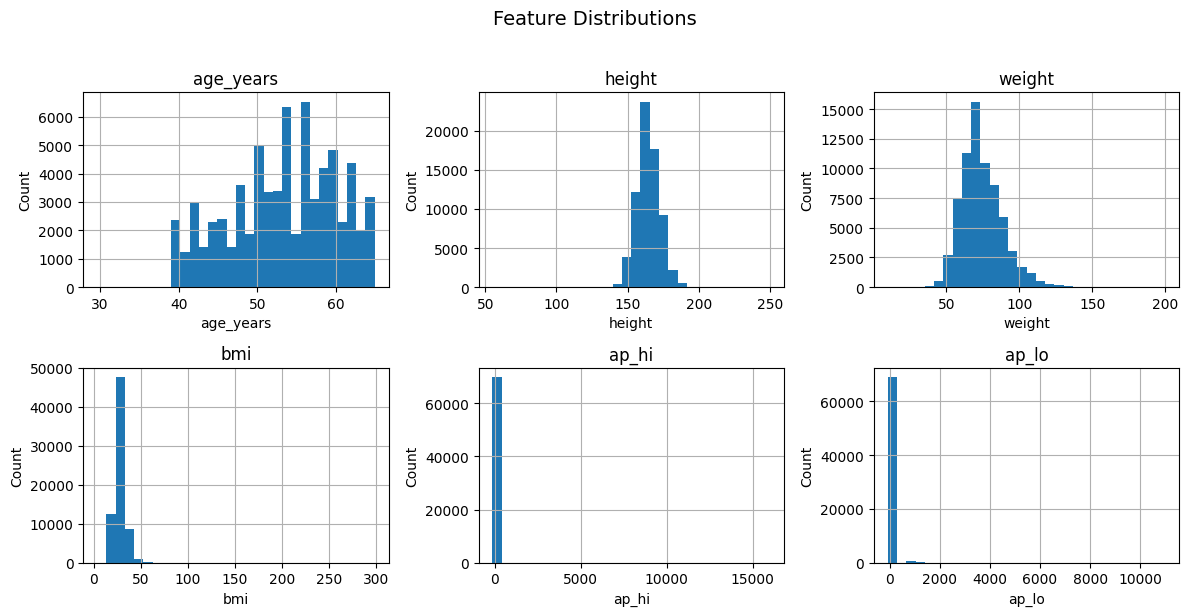

In [ ]:
# import math
# import matplotlib.pyplot as plt

# # choose your dataframe & feature list
# X = df  # or df
# features = ["age_years","height","weight","bmi","ap_hi","ap_lo"]  # edit as you like

# n = len(features)
# cols = 3                                  # how many plots per row
# rows = math.ceil(n / cols)

# fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3), squeeze=False)

# for i, col in enumerate(features):
#     ax = axes[i // cols, i % cols]
#     X[col].dropna().hist(bins=30, ax=ax)
#     ax.set_title(col)
#     ax.set_xlabel(col)
#     ax.set_ylabel("Count")

# # hide any empty subplots
# for j in range(n, rows*cols):
#     fig.delaxes(axes[j // cols, j % cols])

# fig.suptitle("Feature Distributions", y=1.02, fontsize=14)
# fig.tight_layout()
# plt.show()


In [ ]:
rules = (
    (df["age_years"].between(18, 90)) &
    (df["height"].between(120, 220)) &
    (df["weight"].between(30, 250)) &
    (df["ap_hi"].between(70, 250)) &
    (df["ap_lo"].between(40, 150)) &
    (df["ap_hi"] >= df["ap_lo"])
)
clean = df[rules].copy()
print("Kept:", clean.shape, "Removed:", df.shape[0]-clean.shape[0])

In [ ]:
# import numpy as np

# def count_outliers_iqr(df, cols=None, k=1.5):
#     """
#     Count outliers per column using IQR method.
    
#     Parameters:
#         df : DataFrame
#         cols : list of columns to check (default: all numeric)
#         k : multiplier for IQR (default 1.5)
#     """
#     if cols is None:
#         cols = df.select_dtypes(include=np.number).columns

#     for col in cols:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower, upper = Q1 - k*IQR, Q3 + k*IQR
#         n_outliers = ((df[col] < lower) | (df[col] > upper)).sum()
#         print(f"{col:<10}: {n_outliers} outliers")


In [170]:
outline_free_df = df.copy()
outline_free_df[['height', 'weight']] = np.log(outline_free_df[['height', 'weight']])
outliers(outline_free_df[['height', 'weight']])


For the feature height, No of Outliers is 484
For the feature weight, No of Outliers is 1174


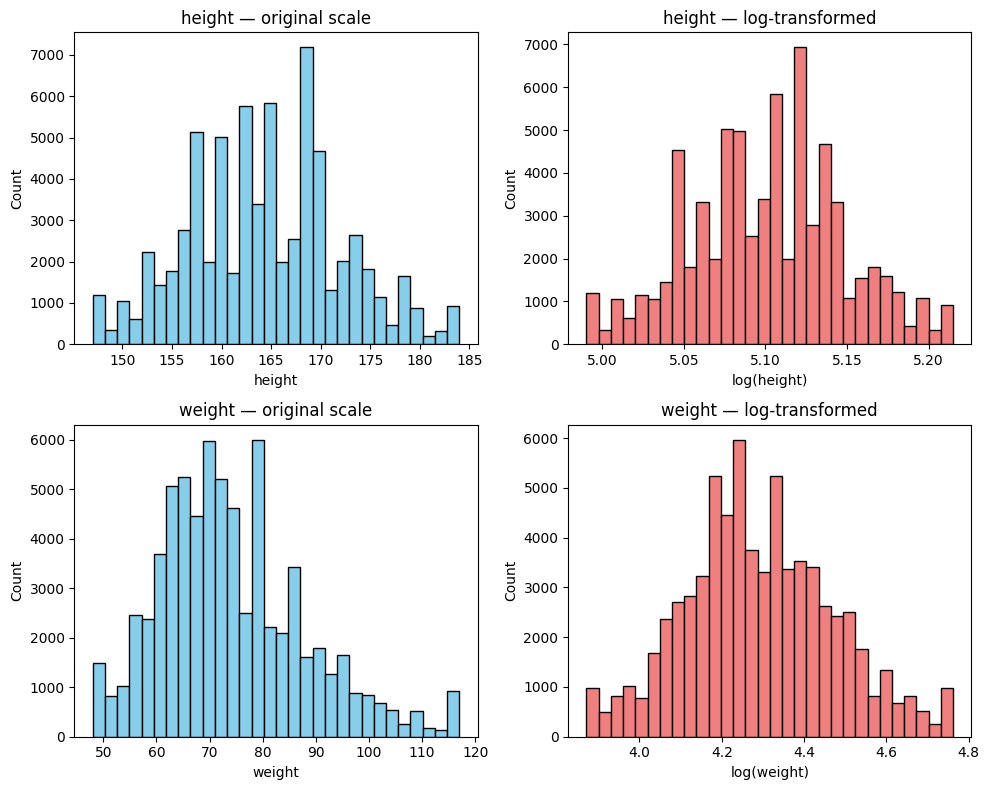

In [176]:
import numpy as np
import matplotlib.pyplot as plt

# pick the columns you want to visualize
cols = ["height", "weight"]

fig, axes = plt.subplots(len(cols), 2, figsize=(10, 4*len(cols)))

for i, col in enumerate(cols):
    # original
    axes[i, 0].hist(df[col], bins=30, color="skyblue", edgecolor="black")
    axes[i, 0].set_title(f"{col} — original scale")
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel("Count")

    # log-transformed
    axes[i, 1].hist(np.log(df[col]), bins=30, color="lightcoral", edgecolor="black")
    axes[i, 1].set_title(f"{col} — log-transformed")
    axes[i, 1].set_xlabel(f"log({col})")
    axes[i, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()
